In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [65]:
data = pd.read_parquet("data.parquet")

In [66]:
data.tail()

,WfeRms,SegmentWfeRms,SegmentPiston,Wavefront,ReconWavefront,ResidualWfeRms,SegmentResidualWfeRms,SegmentResidualPiston,ResidualWavefront
245,[1.3881111726732343e-06],"[1.1727678383977036e-06, 6.044014639883244e-07...","[-3.392913640709594e-06, -1.0848217470993404e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.2846452364101424e-06],"[1.5170923006735393e-07, 1.54395735307844e-07,...","[-3.4018169117189245e-06, -2.711419426759676e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
246,[1.3899946225137683e-06],"[1.1735882026187028e-06, 6.037554385329713e-07...","[-3.3980777516262606e-06, -1.0829935490619391e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.28696910906001e-06],"[1.5184028256953752e-07, 1.5422162391587335e-0...","[-3.4070021683874074e-06, -2.760568804660579e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
247,[1.3918963759351755e-06],"[1.1744210723918513e-06, 6.030360282238689e-07...","[-3.403302343940595e-06, -1.0811479569383664e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.2893161738247727e-06],"[1.516076935104138e-07, 1.5421099419654638e-07...","[-3.4122620036214357e-06, -2.806658869758394e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
248,[1.393816773997969e-06],"[1.1752695172617678e-06, 6.024125696058036e-07...","[-3.4084744129359024e-06, -1.079316120922158e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.2915819525005645e-06],"[1.515227978643452e-07, 1.5414532583690743e-07...","[-3.4175029668404022e-06, -2.8485263214861334e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
249,[1.395710455653898e-06],"[1.1760752158807009e-06, 6.017379519107635e-07...","[-3.413601461943472e-06, -1.0774368774946197e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1.2937965720993816e-06],"[1.511769340822866e-07, 1.5451870183369465e-07...","[-3.4226479783683317e-06, -2.886235961341299e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


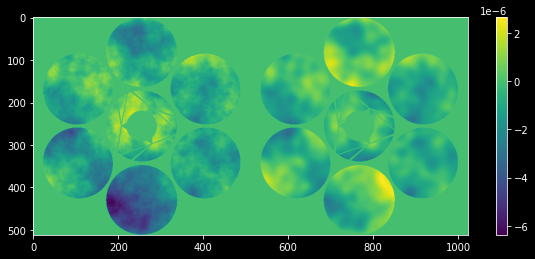

In [67]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.hstack([np.vstack(data["Wavefront"])[-1].reshape(-1,512),\
                      -np.vstack(data["ReconWavefront"])[-1].reshape(-1, 512)]))
fig.colorbar(h,ax=ax)

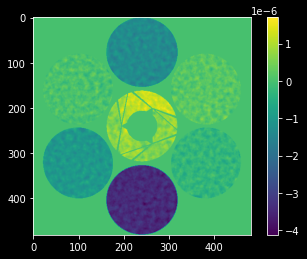

In [68]:
plt.imshow(np.vstack(data["ResidualWavefront"])[-1].reshape(-1,60*8+1))
plt.colorbar()


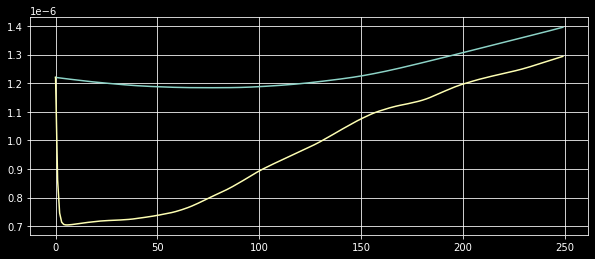

In [69]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.vstack(data["WfeRms"]))
ax.plot(np.vstack(data["ResidualWfeRms"]))
ax.grid()


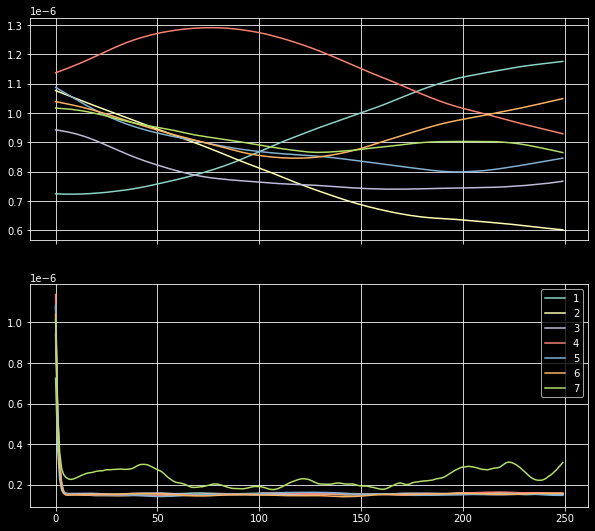

In [70]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentWfeRms"]))
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualWfeRms"]))
ax.grid()
ax.legend(range(1, 8))


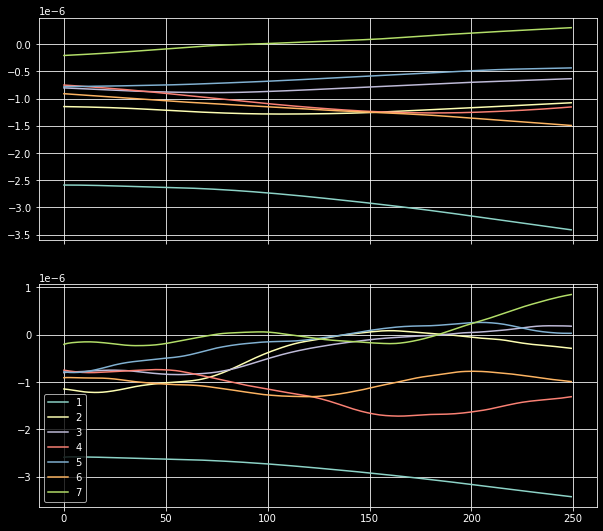

In [71]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentPiston"]))
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualPiston"]))
ax.grid()
ax.legend(range(1, 8))


In [72]:
frame = pd.read_parquet("frame.parquet")
frame

,DetectorFrame
0,"[201956480.0, 155090450.0, 143127620.0, 169414..."


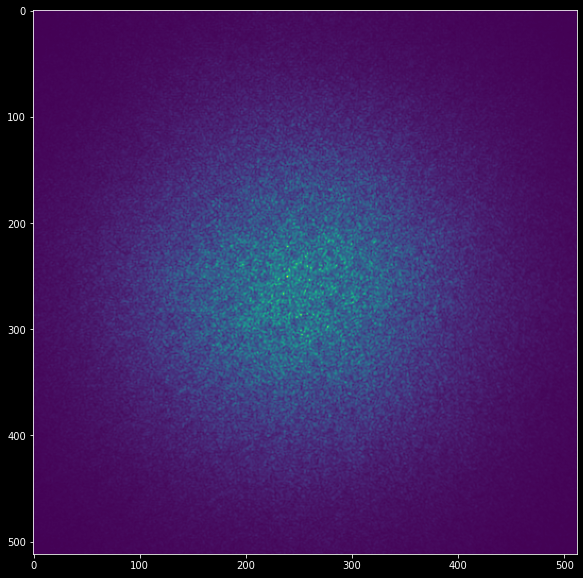

In [73]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(np.vstack(frame['DetectorFrame']).reshape(512,-1))
